<a href="https://colab.research.google.com/github/lupis30puc/BERT_interpretation_with_RF/blob/main/analysis_subsamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On this notebook, I generate subsamples to analyze the feature contributions per review. 

I get 5% of the samples per category in a random way. 

And then I create length segments to compare the reviews with the different length.

These subsamples will be the input for the notebook feature_contributions_analysis . 

## Set Up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import math

import time


In [ ]:
# function so that the graphs look good 
def set_plotting_style():
  tw = 1.5
  rc = {'lines.linewidth': 2,
              'axes.labelsize': 18,
              'axes.titlesize': 21,
              'xtick.major' : 16,
              'ytick.major' : 16,
              'xtick.major.width': tw,
              'xtick.minor.width': tw,
              'ytick.major.width': tw,
              'ytick.minor.width': tw,
              'xtick.labelsize': 'large',
              'ytick.labelsize': 'large',
              'font.family': 'sans',
              'weight':'bold',
              'grid.linestyle': ':',
              'grid.linewidth': 1.5,
              'grid.color': '#ffffff',
              'mathtext.fontset': 'stixsans',
              'mathtext.sf': 'fantasy',
              'legend.frameon': True,
              'legend.fontsize': 12, 
            "xtick.direction": "in","ytick.direction": "in"}

  plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
  plt.rc('mathtext', fontset='stixsans', sf='sans')
  sns.set_style('ticks', rc=rc)
  sns.set_context('notebook', rc=rc)


In [ ]:
# Loading all reviews to get samples
reviews = pd.read_pickle('/content/drive/MyDrive/Yelp/sample_categories.pkl')
reviews.head(1)

,text,label,categories,clean_text,category,length
0,This actually used to be one of my favorite ho...,0,"Casinos, Nightlife, Restaurants, Hotels & Trav...",actually favorite hotel casinos day things cha...,Hotel Industry,265


In [ ]:
reviews.shape

(12993, 6)

In [ ]:
below_length = reviews[reviews['length']<4]
all_reviews = reviews[reviews.isin(below_length)==False]
all_reviews.dropna(inplace=True)
all_reviews.shape

(12987, 6)

## Samples per category

In [ ]:
reviews['length'].describe()

count    12993.000000
mean        47.718464
std         42.064071
min          1.000000
25%         20.000000
50%         34.000000
75%         61.000000
max        396.000000
Name: length, dtype: float64

In [ ]:
all_reviews['category'].value_counts().apply(lambda c: round(c / len(all_reviews) *100), print('Percentages:'))

Percentages:


Restaurant Industry    71
Other Industries       11
Service Industry        7
Hotel Industry          6
Beauty Industry         5
Name: category, dtype: object

In [ ]:
all_reviews['length'].describe()

count    12987.000000
mean        47.739586
std         42.062299
min          4.000000
25%         20.000000
50%         34.000000
75%         61.000000
max        396.000000
Name: length, dtype: float64

In [ ]:
# determining the categories samples
restaurant = all_reviews[all_reviews['category'] == 'Restaurant Industry'].sample(frac=0.050, random_state=42)
beauty = all_reviews[all_reviews['category'] == 'Beauty Industry'].sample(frac=0.050, random_state=42)
other = all_reviews[all_reviews['category'] == 'Other Industries'].sample(frac=0.050, random_state=42)
hotel = all_reviews[all_reviews['category'] == 'Hotel Industry'].sample(frac=0.050, random_state=42)
service = all_reviews[all_reviews['category'] == 'Service Industry'].sample(frac=0.050, random_state=42)
print(len(restaurant), len(beauty), len(other), len(hotel), len(service))

459 35 72 36 47


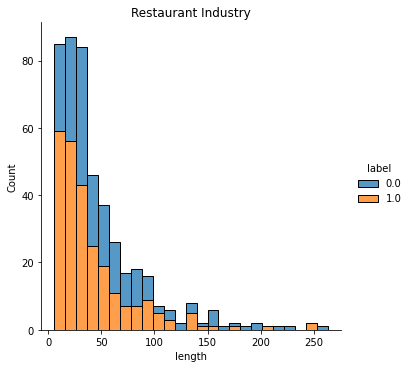

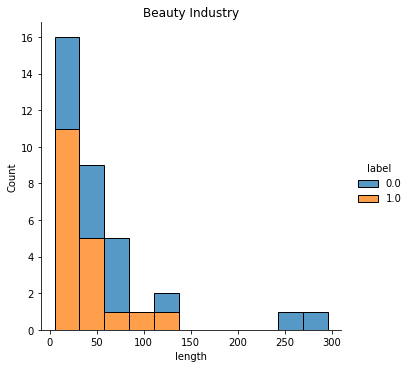

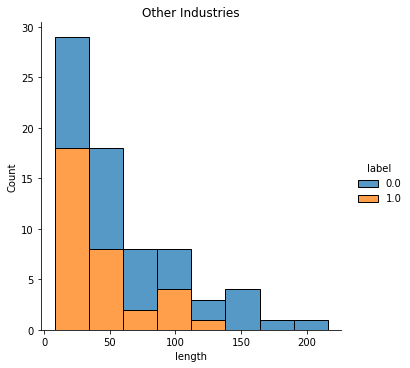

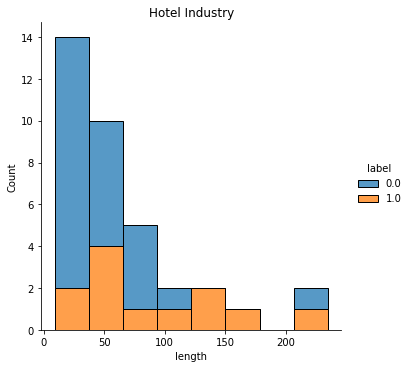

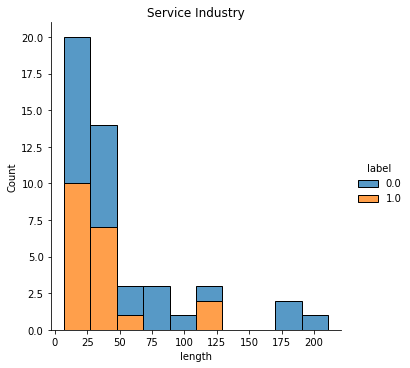

In [ ]:
cat_samples = [restaurant, beauty, other, hotel, service]
for df in cat_samples:
  plot =sns.displot(data=df, x='length', hue='label', multiple='stack')
  plt.title(df.category.max())

## Samples per length

In [ ]:
quant = [0.25, 0.50, 0.75, 0.95, 0.98]
print([np.quantile(all_reviews['length'], q) for q in quant])
# meaning that the reviews of more that 173 words are less than 0.2 percent of the whole sample

[20.0, 34.0, 61.0, 128.0, 173.0]


In [ ]:
len(all_reviews['length'][all_reviews.length > 173])

258

In [ ]:
l_25 = pd.concat([restaurant[restaurant['length'] <= 20], other[other['length'] <= 20], beauty[beauty['length'] <= 20], hotel[hotel['length'] <= 20], service[service['length'] <= 20]])
len(l_25)

172

In [ ]:
l_25.length.sort_values(ascending=True)[:10]

11648    5.0
8198     6.0
3991     7.0
7364     7.0
11160    7.0
7881     7.0
11315    8.0
5496     8.0
7586     8.0
1498     8.0
Name: length, dtype: float64

In [ ]:
l_50 = pd.concat([restaurant[restaurant['length'] <= 34], other[other['length'] <= 34], beauty[beauty['length'] <= 34], hotel[hotel['length'] <= 34], service[service['length']<= 34]])
len(l_50)

328

In [ ]:
l_50 = l_50[l_50.index.isin(l_25.index)==False]
len(l_50)

156

In [ ]:
l_50.length.sort_values(ascending=True)[:10]

12237    21.0
1158     21.0
2637     21.0
11650    21.0
7988     21.0
11210    21.0
5066     21.0
12817    21.0
4625     21.0
8183     22.0
Name: length, dtype: float64

In [ ]:
l_75 = pd.concat([restaurant[restaurant['length'] <= 61], other[other['length'] <= 61], beauty[beauty['length'] <= 61], hotel[hotel['length'] <= 61], service[service['length']<= 61]])
len(l_75)

481

In [ ]:
l_75 = l_75[l_75.index.isin(l_25.index.append(l_50.index))==False]
len(l_75)

153

In [ ]:
l_75.length.sort_values(ascending=True)[:10]

5534     35.0
5262     35.0
10357    35.0
7044     35.0
7034     35.0
10241    35.0
3484     35.0
2805     35.0
9414     35.0
11989    35.0
Name: length, dtype: float64

In [ ]:
l_100 = pd.concat([restaurant[restaurant['length'] > 61], other[other['length'] > 61], beauty[beauty['length'] > 61], hotel[hotel['length'] > 61], service[service['length']>61]])
len(l_100)

168

In [ ]:
l_100.length.sort_values(ascending=False)[:10]

3469     296.0
5956     263.0
2530     258.0
7549     252.0
10741    249.0
5468     235.0
2464     232.0
2766     223.0
1388     220.0
2604     216.0
Name: length, dtype: float64

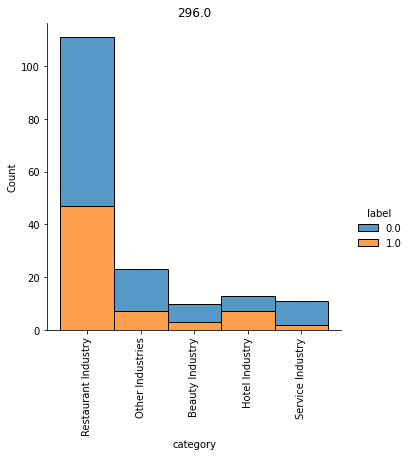

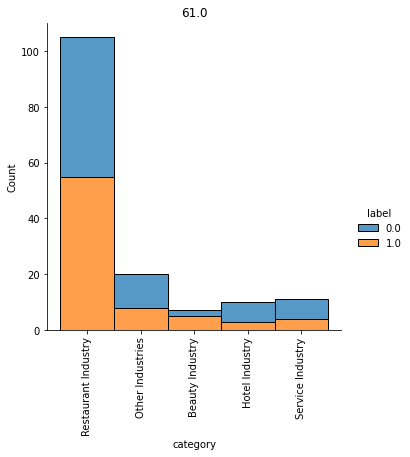

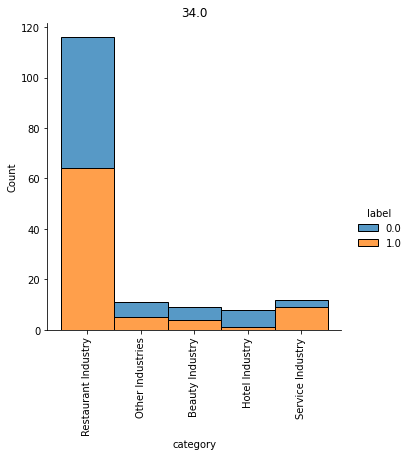

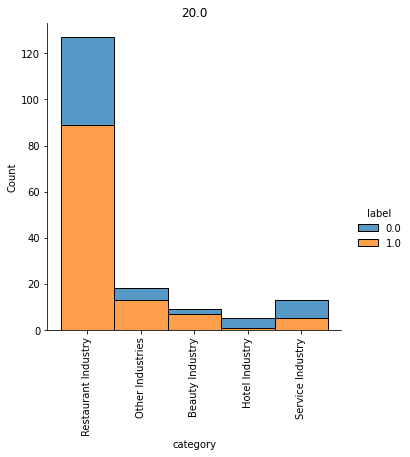

In [ ]:
len_samples = [l_100, l_75, l_50, l_25]
for df in len_samples:
  plot =sns.displot(data=df, x='category', hue='label', multiple='stack')
  plt.xticks(rotation=90)
  plt.title(df.length.max())

## Saving the samples for analysis

In [ ]:
print(len(restaurant), len(beauty), len(other), len(hotel), len(service))
print(len(l_100), len(l_75), len(l_50), len(l_25))

459 35 72 36 47
168 153 156 172


In [ ]:
print(len(restaurant)+len(beauty)+len(other)+len(hotel)+len(service))
print(len(l_100)+len(l_75)+len(l_50)+len(l_25))

649
649


In [ ]:
samples = [restaurant, beauty, other, hotel, service, l_100, l_75, l_50, l_25]
names = ['restaurant', 'beauty', 'other', 'hotel', 'service', 'quantile_100', 'quantile_75', 'quantile_50', 'quantile_25']
for df in range(len(samples)):
  samples[df].to_pickle('/content/drive/MyDrive/Yelp/features_analysis/' + names[df] +'_5perc.pkl')
  print(names[df] + ' is saved.')

restaurant is saved.
beauty is saved.
other is saved.
hotel is saved.
service is saved.
quantile_100 is saved.
quantile_75 is saved.
quantile_50 is saved.
quantile_25 is saved.


In [ ]:
649/len(all_reviews)

0.04997304997304997